# Machine Learning Model - Feature Engineering (Tổng hợp biến phái sinh)

In [1]:
# Ví dụ dữ liệu Nominal và Ordinal
# Trình độ học vấn
arr = ['cấp 1', 'cấp 2', 'cấp 3', 'đại học', 'sau đại học'] # => sự sắp xếp nhất định
arr1 = ['nhân viên', 'nhóm trưởng', 'trưởng phòng', 'giám đốc chi nhánh', 'giám đốc vùng'] # => thứ tự nhất định
# Ordinal
# Nominal dữ liệu chữ nhưng ko có giá trị để sắp xếp
arr2 = ['bò sát', 'có vú', 'gia cầm', 'giáp xác']

### Maintain:
1. Pre- processing cleaning (missing data processing and cleaning database) pandas
2. Feature engineering (creat new columns: age_groups.......) 
***Pre-procesisng and Feature engineering . Build the new columns)
continous -> zscore***

4. Modeling and Analytocal techniques (sampling and unsampling)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic = sns.load_dataset('titanic')
display(titanic.info(), titanic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


None

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# titanic = titanic.drop(columns=['survived', 'pclass', 'embarked', 'who', 'adult_male', 'alone'])
# titanic

In [5]:
## Kiem tra chat luong du lieu

In [6]:
titanic.isnull().sum() # Python True = 1, False = 0

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
### Xu ly du lieu bi thieu

In [8]:
titanic['embark_town'].value_counts(dropna=False)

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

In [9]:
filter1 = titanic['embark_town'].isnull() # lọc các bản ghi bị thiếu dữ liệu embark_town
titanic[filter1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [10]:
titanic['embark_town'].fillna('Unknown') # No brainer (ít quan sát bị thiếu)

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [11]:
filter1 = (titanic['who'] == 'woman') 
filter2 = (titanic['class'] == 'First')
# filter3 = (titanic['fare'] == 80)
ser = titanic[filter1 & filter2]
ser

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


In [12]:
ser['embark_town'].value_counts() # mặc định sẽ thể hiện giá trị lớn nhất trên cùng .index[0]

Southampton    45
Cherbourg      43
Queenstown      1
Name: embark_town, dtype: int64

In [13]:
ser['embark_town'].value_counts().idxmax()

'Southampton'

In [14]:
titanic['embark_town'] = titanic['embark_town'].fillna(ser['embark_town'].value_counts().idxmax())

In [15]:
titanic['embark_town'].value_counts(dropna=False)

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [16]:
titanic['embark_town'] = titanic['embark_town'].fillna('Unknown')

In [17]:
titanic['embark_town'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [18]:
# Fillna for deck

In [19]:
titanic['deck'].value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [20]:
titanic['deck'].fillna('Unknown')

ValueError: fill value must be in categories

In [ ]:
titanic['deck'] = titanic['deck'].cat.add_categories('Unknown')
titanic['deck']

In [ ]:
titanic['deck'].fillna('Unknown')

In [ ]:
titanic['deck'] = titanic['deck'].fillna('Unknown')

In [ ]:
titanic['deck'].isnull().sum()

In [ ]:
# Special case: fillna for age:

In [ ]:
titanic['age']

In [ ]:
titanic['age'].isnull().sum() / len(titanic['age'])

In [ ]:
sns.histplot(titanic, x='age', hue='survived', kde=True)

In [ ]:
sns.scatterplot(data=titanic, x='age', y='fare')

In [ ]:
titanic['who'].value_counts()

In [ ]:
titanic['sibsp'].value_counts()

In [ ]:
titanic['parch'].value_counts()

In [ ]:
sns.scatterplot(data=titanic, x='age', y='parch')

In [ ]:
sns.boxplot(data=titanic, x='parch', y='age')

In [ ]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].agg(lambda x: x.isnull().sum()/len(x))

In [ ]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].agg([len, 'mean', lambda x: (x.isnull().sum())/len(x)])

In [ ]:
ser = titanic.groupby(['who', 'sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean())) # điền các giá trị bị thiếu bằng giá trị trung bình của nhóm
ser

In [ ]:
ser.isnull().sum()

In [ ]:
titanic['age'] = ser

In [ ]:
titanic.groupby(['sibsp', 'parch'])['age'].agg([len, 'mean', lambda x: (x.isnull().sum())/len(x)])

In [ ]:
ser = titanic.groupby(['sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))
ser

In [ ]:
ser.isnull().sum()

In [ ]:
titanic['age'] = ser

In [ ]:
titanic['age'].isnull().sum()

In [ ]:
titanic[titanic['who'] == 'child']['age'].mean()

In [ ]:
titanic['age'] = titanic['age'].fillna(titanic[titanic['who'] == 'child']['age'].mean())

In [ ]:
titanic['age'].isnull().sum()

In [ ]:
# Dien du lieu bi thieu bang tep sisp va parch lon nhat

In [ ]:
# Tao bien bang cach chia bin du lieu

In [ ]:
sns.histplot(data=titanic, x='age', hue='survived', kde=True, stat='probability', common_norm=False)

In [ ]:
age_groups = [0, 15, 25, 35, 45, 60, 80, 100]
pd.cut(titanic['age'], bins=age_groups)

In [ ]:
titanic['age_group'] = pd.cut(titanic['age'], bins=age_groups)
titanic['age_group']

In [ ]:
titanic

In [ ]:
# Tao bien bang bien chi bao (female & first class)

In [ ]:
filter1 = titanic['sex'] == 'female'
filter2 = titanic['pclass'] < 3
(filter1 & filter2)

In [29]:
titanic['female_from_2nd_class'] = (filter1 & filter2)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
survived                 891 non-null int64
pclass                   891 non-null int64
sex                      891 non-null object
age                      714 non-null float64
sibsp                    891 non-null int64
parch                    891 non-null int64
fare                     891 non-null float64
embarked                 889 non-null object
class                    891 non-null category
who                      891 non-null object
adult_male               891 non-null bool
deck                     203 non-null category
embark_town              891 non-null object
alive                    891 non-null object
alone                    891 non-null bool
female_from_2nd_class    891 non-null bool
dtypes: bool(3), category(2), float64(2), int64(4), object(5)
memory usage: 81.5+ KB


In [ ]:
# Tao bien bang tinh z-score (bien doi phan phoi)

In [ ]:
sns.histplot(titanic, x='fare', hue='survived', kde=True)

In [ ]:
np.log(titanic['fare'])

In [ ]:
ser = np.log(titanic['fare'].where(titanic['fare'] > 0, 1)) # where của pandas => nhận vào 1 điều kiện, nếu ko đáp ứng đc điều kiện, nó sẽ nhận giá trị mà mình quy định
ser

In [ ]:
sns.histplot(ser, kde=True)

In [ ]:
# Tính z-score
ser.mean(), ser.std()

In [ ]:
new_ser = (ser - ser.mean())/ser.std()
new_ser

In [ ]:
sns.histplot(new_ser, kde=True)

In [ ]:
new_ser.mean(), new_ser.std()

In [21]:
## Data Sampling
length_data = len(titanic)
sample_size = int(0.8*length_data)
print(sample_size)

712


In [22]:
sample_data = titanic.sample(sample_size)
sample_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
131,0,3,male,20.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
780,1,3,female,13.0,0,0,7.2292,C,Third,child,False,NaN,Cherbourg,yes,True
275,1,1,female,63.0,1,0,77.9583,S,First,woman,False,D,Southampton,yes,False
544,0,1,male,50.0,1,0,106.4250,C,First,man,True,C,Cherbourg,no,False
706,1,2,female,45.0,0,0,13.5000,S,Second,woman,False,NaN,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
70,0,2,male,32.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
810,0,3,male,26.0,0,0,7.8875,S,Third,man,True,NaN,Southampton,no,True
224,1,1,male,38.0,1,0,90.0000,S,First,man,True,C,Southampton,yes,False


In [23]:
unsample_data = titanic[~titanic.index.isin(sample_data.index)]
unsample_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


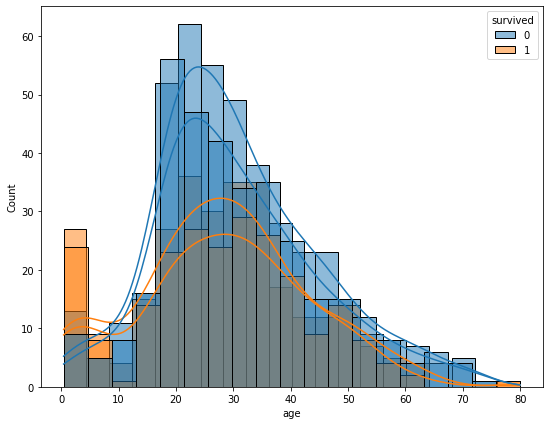

In [55]:
# Tinh ti le survived
plt.figure(figsize = (9,7))
ax = sns.histplot(data=titanic, x='age', kde=True, hue='survived', common_norm=False)
sns.histplot(data=sample_data, x='age', kde=True, hue='survived', common_norm=False, ax=ax)

In [45]:
# Sampling bang scikit learn

In [46]:
from sklearn.model_selection import train_test_split
sample_data, _ = train_test_split(titanic, train_size=0.8, stratify=titanic['survived'], random_state=42)

In [47]:
# Using train test lit to separate data frame basing on % which defined before

In [48]:
sample_set, unsample_set = train_test_split(titanic, train_size=0.8)

In [49]:
sample_set.shape

(712, 16)

In [50]:
unsample_set.shape

(179, 16)

In [51]:
sample_set, unsample_set =train_test_split(titanic, train_size=0.8, random_state=42, stratify = titanic['survived'])

In [52]:
sample_set.shape

(712, 16)

In [42]:
unsample_set.shape

(179, 16)

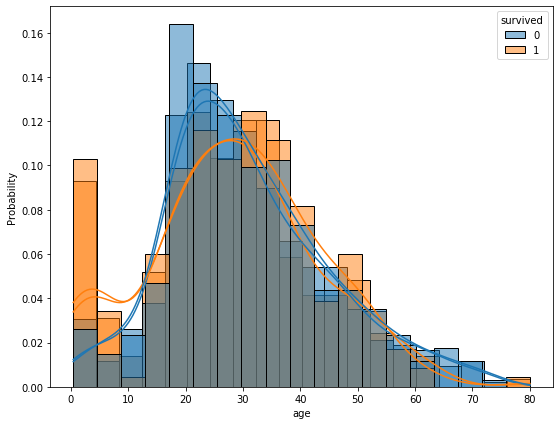

In [54]:
# Tinh ti le survived
plt.figure(figsize= (9,7))
ax = sns.histplot(data=titanic, x='age', kde=True, hue='survived', common_norm=False, stat = 'probability')
sns.histplot(data=sample_data, x='age', kde=True, hue='survived', common_norm=False, ax=ax, stat = 'probability')

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
ser = scaler.fit_transform(titanic[['fare']])
titanic['fare_std'] = ser

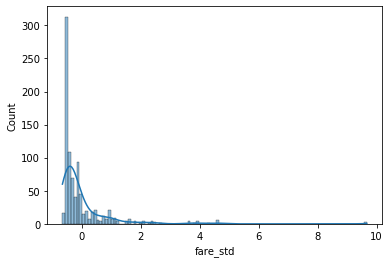

In [63]:
sns.histplot(data = titanic, x = 'fare_std', kde = True)

In [65]:
scaler =RobustScaler()
ser = scaler.fit_transform(titanic[['fare']])
titanic['fare_robust'] = ser

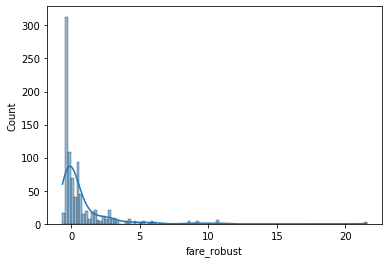

In [66]:
sns.histplot(data = titanic, x = 'fare_robust', kde = True)

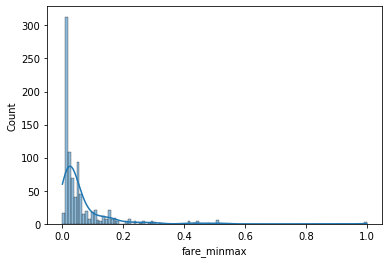

In [67]:
scaler =MinMaxScaler()
ser = scaler.fit_transform(titanic[['fare']])
titanic['fare_minmax'] = ser
sns.histplot(data = titanic, x = 'fare_minmax', kde = True)

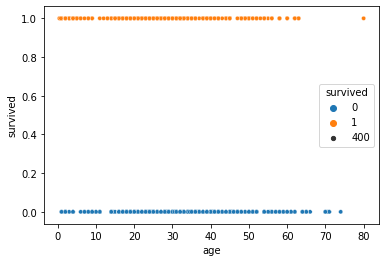

In [68]:
sns.scatterplot(data = titanic, x = 'age', y = 'survived', hue = 'survived', size= 400)